In [1]:
import os
import shutil

from google.colab import drive
drive.mount('/content/gdrive')

!ln -s '/content/gdrive/MyDrive' /currdrive


Mounted at /content/gdrive


## Download Dataset

In [ ]:
# Download dataset from Kaggle
from google.colab import files
files.upload()         # expire any previous token(s) and upload recreated token


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ra9hur","key":"4490796ce6bceaabae05517ea2de2029"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# ! kaggle competitions download -c 'name-of-competition'
# !kaggle competitions download -c house-prices-advanced-regression-techniques
# !kaggle datasets download *url_suffix* -p /content/sample_data/ --unzip
# !kaggle datasets download 'https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/download?datasetVersionNumber=5' -p /currdrive/animals/data --unzip
# !kaggle datasets download animal-image-dataset-90-different-animals -p /currdrive/animals/data --unzip
#animal-image-dataset-90-different-animals
!kaggle datasets download iamsouravbanerjee/animal-image-dataset-90-different-animals -p /currdrive/animals/data --unzip


 99% 647M/656M [00:04<00:00, 115MB/s]
100% 656M/656M [00:04<00:00, 144MB/s]


In [ ]:
!ls /currdrive/animals/data/*/*.jpg | wc -l


5400


In [ ]:
!ls /currdrive/animals/data/zebra/*.jpg | wc -l


60


Corresponding to each class, there are 60 images and a total of 5400 images for 90 classes.

In [ ]:
!kaggle datasets download constantinwerner/human-detection-dataset -p /currdrive/human/data --unzip


 99% 257M/260M [00:02<00:00, 125MB/s]
100% 260M/260M [00:02<00:00, 122MB/s]


In [ ]:
!ls /currdrive/human/data/human_detection_dataset/1/* | wc -l


559


In [ ]:
!ls /currdrive/human/data/human_detection_dataset/0/* | wc -l


116


In [ ]:
# os.mkdir('/currdrive/human/human')
os.mkdir('/currdrive/human/none')


In [ ]:
import cv2

# Set image directory path
image_path = '/currdrive/human/data/human_detection_dataset'

os.chdir(image_path)

# Walk through the image dir 
for current_dir, dirs, files in os.walk('./0'):
	# Iterating through the files
  for f in files:
    if f.endswith('.png'):
      # Load .png image
      image_name = f[:f.index('.')]
      image = cv2.imread('./0/' + f)

      # Save .jpg image
      cv2.imwrite('/currdrive/human/none/' + image_name + '.jpg', image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])


In [ ]:
!mv /currdrive/human/none /currdrive/animals/data/none
!mv /currdrive/human/human /currdrive/animals/data/human


In [ ]:
data_dir = '/currdrive/animals/data/'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 


['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra', 'human', 'none']
92


## Pre-process Data

In [2]:
# Importing important packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Import Keras specific packages
from tensorflow import keras
from keras.models import Model
from keras import layers
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.inception_v3 import InceptionV3
#from keras.applications import EfficientNetB4
from keras.preprocessing.image import ImageDataGenerator


In [4]:
preprocess_input = tf.keras.applications.efficientnet_v2.preprocess_input
#preprocess_input = tf.keras.applications.resnet.preprocess_input

batch_size=64

# Rescaling the input image as well as Data Augmentation
# train_datagen = ImageDataGenerator(rescale = 1./255,
train_datagen = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=30,
        width_shift_range=0.2,
        preprocessing_function=preprocess_input,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# For EfficientNet, rescaling is implemented in the model
# https://keras.io/api/applications/efficientnet_v2/#efficientnetv2b1-function
#validation_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.1)
validation_datagen = ImageDataGenerator(validation_split=0.1)

data_dir = "/currdrive/animals/data/"

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
    batch_size=batch_size,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='categorical',
    batch_size=batch_size,
    subset = "validation")


Found 5058 images belonging to 92 classes.
Found 631 images belonging to 92 classes.


In [5]:
os.chdir('/content')

# https://stackoverflow.com/questions/58182464/python-numpy-cannot-get-array-to-save-load-properly
np.save('class_labels', train_generator.class_indices)


In [ ]:
class_indices = np.load('class_labels.npy', allow_pickle=True).item()
print(class_indices)


{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'human': 39, 'hummingbird': 40, 'hyena': 41, 'jellyfish': 42, 'kangaroo': 43, 'koala': 44, 'ladybugs': 45, 'leopard': 46, 'lion': 47, 'lizard': 48, 'lobster': 49, 'mosquito': 50, 'moth': 51, 'mouse': 52, 'not_an_animal': 53, 'octopus': 54, 'okapi': 55, 'orangutan': 56, 'otter': 57, 'owl': 58, 'ox': 59, 'oyster': 60, 'panda': 61, 'parrot': 62, 'pelecaniformes': 63, 'penguin': 64, 'pig': 65, 'pigeon': 66, 'porcupine': 67, 'possum': 68, 'raccoon': 69, 'rat': 

## Create Model

In [ ]:
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
# https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet
# https://keras.io/api/applications/

#!wget --no-check-certificate \
#    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#    -O /currdrive/animals/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

#!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b4.tar.gz

!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b1.tar.gz

!tar -xf noisy_student_efficientnet-b1.tar.gz



--2022-09-07 08:56:30--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/noisystudent/noisy_student_efficientnet-b1.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.128, 172.217.219.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57923575 (55M) [application/octet-stream]
Saving to: ‘noisy_student_efficientnet-b1.tar.gz’

noisy_student_effic 100%[===================>]  55.24M   138MB/s    in 0.4s    

2022-09-07 08:56:31 (138 MB/s) - ‘noisy_student_efficientnet-b1.tar.gz’ saved [57923575/57923575]



In [ ]:
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
# https://github.com/keras-team/keras/blob/master/keras/applications/efficientnet_weight_update_util.py
# Copy efficientnet_weight_update_util.py script to the local directory to execute

!python efficientnet_weight_update_util.py --model b1 --notop --ckpt \
        noisy_student_efficientnet-b1/model.ckpt --o efficientnetb1_notop.h5


2022-09-07 08:57:57.387118: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
27033600/27018416 [==============================] - 0s 0us/step
check variables match in each block
blocks_0 and block1a match.
blocks_1 and block1b match.
blocks_2 and block2a match.
blocks_3 and block2b match.
blocks_4 and block2c match.
blocks_5 and block3a match.
blocks_6 and block3b match.
blocks_7 and block3c match.
blocks_8 and block4a match.
blocks_9 and block4b match.
blocks_10 and block4c match.
blocks_11 and block4d match.
blocks_12 and block5a match.
blocks_13 and block5b match.
blocks_14 and block5c match.
blocks_15 and block5d match.
blocks_16 and block6a match.
blocks_17 and block6b match.
blocks_18 and block6c match.
blocks_19 and block6d match.
blocks_20 and block6e match.
blocks_21 and block7a match.
blocks_22 and block7b match.
Skipping variable normalization/mean:0: normalization is a Keras preprocessing l

In [ ]:
!mv efficientnetb1_notop.h5 /currdrive/animals/efficientnetb1_notop.h5


In [ ]:
# Assigning the local weights that was downloaded
#local_weights_file = '/currdrive/animals/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

local_weights_file = '/currdrive/animals/efficientnetb1_notop.h5'


In [ ]:
# Using the google EfficientNetB4 pretrained model for transfer learning
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
IMG_SHAPE = (240, 240, 3)
model_B1 = tf.keras.applications.EfficientNetB1(input_shape=IMG_SHAPE, include_top=False, weights=None)

#model_B4 = InceptionV3(input_shape = (255, 255, 3), include_top = False, weights = None)

# drop_connect_rate=0.4

# Loading the pre-trained weights that was downloaded.
model_B1.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in model_B1.layers:
  layer.trainable = False

#model_B1.summary()


In [ ]:
# getting the last layer from the pre_trained model to use for traning
last_layer = model_B1.get_layer('top_activation')
#last_layer = model_B1.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 8, 8, 1280)


In [ ]:
CLASSES = 92

# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)
# Flattening the model to 1 dimension
x = layers.Flatten()(x)

# Add a final sigmoid layer for classification
x = layers.Dense  (CLASSES, activation='softmax')(x)    # CategoricalCrossentropy
# x = layers.Dense(CLASSES)(x)                              # SparseCategoricalCrossentropy

# Append the dense network to the base model
model = Model(model_B1.input, x) 

# Print the model summary. See your dense network connected at the end.
#model.summary()


## Train The Model

In [ ]:
# compiling the model
#from tf.keras.optimizers import Adam
model.compile(optimizer = "rmsprop", 
              loss = tf.keras.losses.CategoricalCrossentropy(), 
              metrics = ['accuracy'])


In [ ]:
# defining the callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after training loss becomes less than 0.15

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.15):

      # Stop if threshold is met
      print("\nLoss is lower than 0.15 so cancelling training!")
      self.model.stop_training = True
    
# Instantiate class
callbacks = myCallback()


In [ ]:
# Fitting the model
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 36,
            epochs = 10,
            callbacks = [callbacks])


Epoch 1/10
36/36 [==============================] - 145s 4s/step - loss: 2.3265 - accuracy: 0.5589 - val_loss: 0.9184 - val_accuracy: 0.8637
Epoch 2/10
36/36 [==============================] - 99s 3s/step - loss: 0.7508 - accuracy: 0.8260 - val_loss: 0.4644 - val_accuracy: 0.8859
Epoch 3/10
36/36 [==============================] - 88s 2s/step - loss: 0.4684 - accuracy: 0.8805 - val_loss: 0.3127 - val_accuracy: 0.9033
Epoch 4/10
36/36 [==============================] - 76s 2s/step - loss: 0.3436 - accuracy: 0.9050 - val_loss: 0.2973 - val_accuracy: 0.9128
Epoch 5/10
36/36 [==============================] - 75s 2s/step - loss: 0.3279 - accuracy: 0.9041 - val_loss: 0.2694 - val_accuracy: 0.9128
Epoch 6/10
36/36 [==============================] - 70s 2s/step - loss: 0.3035 - accuracy: 0.9090 - val_loss: 0.2450 - val_accuracy: 0.9208
Epoch 7/10
36/36 [==============================] - 68s 2s/step - loss: 0.2605 - accuracy: 0.9148 - val_loss: 0.2445 - val_accuracy: 0.9287
Epoch 8/10
36/36 [=

- efficient_b4 ---- classes=92, CategoricalCrossentropy() ---- accuracy: 0.0739
- efficient_b1 ----  classes=92, CategoricalCrossentropy()  ---- loss: 2.4087 - accuracy: 0.5522 - val_loss: 0.9102 - val_accuracy: 0.8526
- efficient_b1 ---- classes=92, CategoricalCrossentropy(), rescaling in dataGen  ---- loss: 4.8481 - accuracy: 0.0558 - val_loss: 4.4755 - val_accuracy: 0.0872
- efficient_b1 ---- classes=92, CategoricalCrossentropy(), adam  ---- loss: 2.6797 - accuracy: 0.5232 - val_loss: 1.0179 - val_accuracy: 0.8700
- inception_v3  ----   classes=92, CategoricalCrossentropy() ---- loss: 4.2726 - accuracy: 0.2739 - val_loss: 3.7447 - val_accuracy: 0.1949
- inception_v3  ----   classes=1, CategoricalCrossentropy(logits=True) ---- Error ---- Matrix size-incompatible: In[0]: [64,92], In[1]: [1024,1]

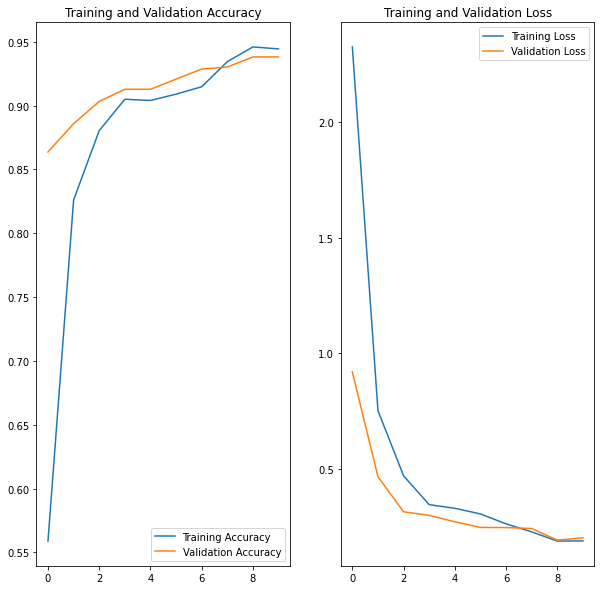

In [ ]:
# Model Evaluation by comparing the training and validation accuracy as well as the loss.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
# Saving the model.
model.save("AnimalClassification.h5")

!mv AnimalClassification.h5 /currdrive/animals/AnimalClassification.h5


## Evaluate the Model

In [ ]:
import os
import shutil

from google.colab import drive
drive.mount('/content/gdrive')

!ln -s '/content/gdrive/MyDrive' /currdrive


Mounted at /content/gdrive


In [ ]:
# Importing important packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Import Keras specific packages
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image
from collections import Counter
#from keras import layers
#from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
#from keras.models import Sequential
#from keras.applications.inception_v3 import InceptionV3
#from keras.applications import EfficientNetB4
#from keras.preprocessing.image import ImageDataGenerator


In [ ]:
model = keras.models.load_model('/currdrive/animals/AnimalClassification.h5')


In [ ]:
# https://datascience.stackexchange.com/questions/31264/in-keras-how-to-get-the-class-indices-or-prediction-labels-for-an-existing-mod

if os.path.isfile('class_labels.npy'):
    class_indices = np.load('class_labels.npy', allow_pickle=True).item()

print(class_indices)


{'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'human': 39, 'hummingbird': 40, 'hyena': 41, 'jellyfish': 42, 'kangaroo': 43, 'koala': 44, 'ladybugs': 45, 'leopard': 46, 'lion': 47, 'lizard': 48, 'lobster': 49, 'mosquito': 50, 'moth': 51, 'mouse': 52, 'not_an_animal': 53, 'octopus': 54, 'okapi': 55, 'orangutan': 56, 'otter': 57, 'owl': 58, 'ox': 59, 'oyster': 60, 'panda': 61, 'parrot': 62, 'pelecaniformes': 63, 'penguin': 64, 'pig': 65, 'pigeon': 66, 'porcupine': 67, 'possum': 68, 'raccoon': 69, 'rat': 

In [ ]:
# https://keras.io/api/applications/

img_path = 'efficientdet_d4_coco17_tpu-32.jpg'
im = image.load_img(img_path, target_size=(240, 240))

# https://keras.io/api/applications/efficientnet_v2/#efficientnetv2b1-function
# For EfficientNet, rescaling is implemented in the model
# Applying rescaling here yields wrong results
#im = image.img_to_array(im)/255.0
im = image.img_to_array(im)

im = im.reshape(1,240,240,3)

single_pred = np.squeeze(model.predict(im))

# https://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary

results_dict = dict(zip(class_indices.keys(), single_pred))

result = max(results_dict, key=results_dict.get)

print(result)

top5_list = sorted(results_dict, key=results_dict.get, reverse=True)[:5]

print(top5_list)

top5 = dict(Counter(results_dict).most_common(5))

for key, value in top5.items():
    top5.update({key: str(round(value*100, 2))+'%'})

print(top5)


not_an_animal
['not_an_animal', 'human', 'caterpillar', 'cow', 'snake']
{'not_an_animal': '75.4%', 'human': '11.51%', 'caterpillar': '5.53%', 'cow': '1.56%', 'snake': '1.19%'}


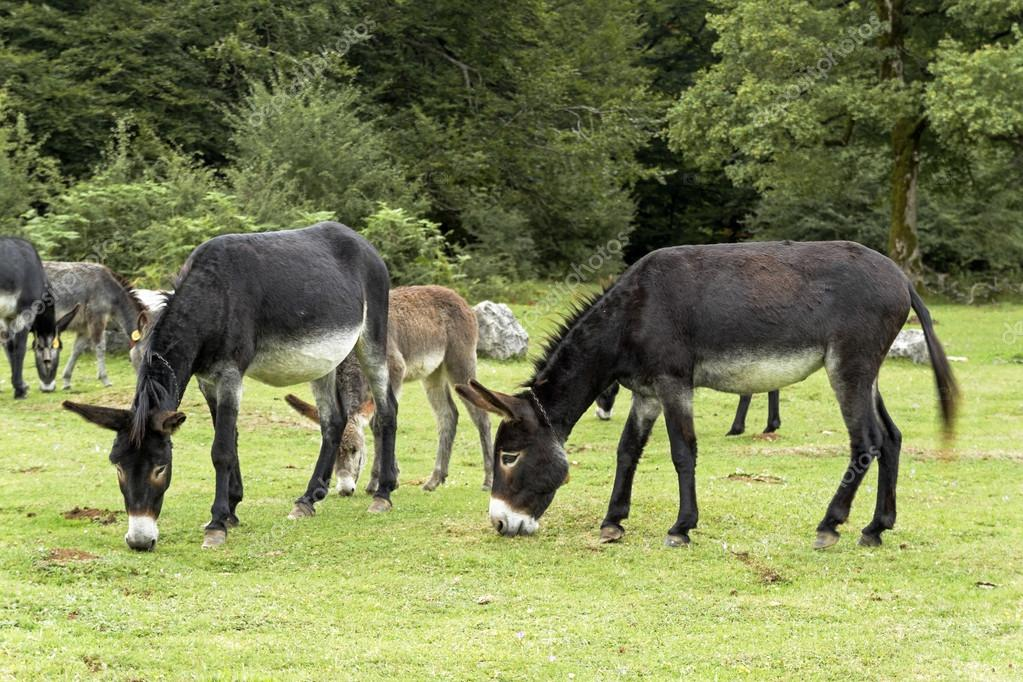

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img_path = 'overGrazing.jpg'
im = cv2.imread(img_path)

cv2_imshow(im)


In [ ]:
# https://keras.io/api/applications/

img_path = 'overGrazing.jpg'
im = image.load_img(img_path, target_size=(240, 240))

# https://keras.io/api/applications/efficientnet_v2/#efficientnetv2b1-function
# For EfficientNet, rescaling is implemented in the model
# Applying rescaling here yields wrong results
#im = image.img_to_array(im)/255.0
im = image.img_to_array(im)

im = im.reshape(1,240,240,3)


In [ ]:
single_pred = np.squeeze(model.predict(im))


In [ ]:
# https://stackoverflow.com/questions/7197315/5-maximum-values-in-a-python-dictionary

results_dict = dict(zip(class_indices.keys(), single_pred))

result = max(results_dict, key=results_dict.get)

print(result)

top5_list = sorted(results_dict, key=results_dict.get, reverse=True)[:5]

print(top5_list)

top5 = dict(Counter(results_dict).most_common(5))
print(top5)

for key, value in top5.items():
    top5.update({key: str(round(value*100, 2))+'%'})

print(top5)


donkey
['donkey', 'cow', 'reindeer', 'okapi', 'human']
{'donkey': 0.96874094, 'cow': 0.014832701, 'reindeer': 0.010613533, 'okapi': 0.002743083, 'human': 0.0008324141}
{'donkey': '96.87%', 'cow': '1.48%', 'reindeer': '1.06%', 'okapi': '0.27%', 'human': '0.08%'}


References:

*   [Model Performance Comparison](https://towardsdatascience.com/efficientnet-should-be-the-goto-pre-trained-model-or-38f719cbfe60)
*   https://www.kaggle.com/code/kasaligabriel/animal-classification-with-tensorflow/notebook



## Using EfficientNet-B1 pre-trained weights

In [ ]:
# Import Keras specific packages
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image
from collections import Counter


In [ ]:
pretrained_B1 = tf.keras.applications.EfficientNetB1(weights="imagenet")


In [ ]:
# https://keras.io/api/applications/

img_path = 'IMAG0270.jpg'
im = image.load_img(img_path, target_size=(240, 240))

# https://keras.io/api/applications/efficientnet_v2/#efficientnetv2b1-function
# For EfficientNet, rescaling is implemented in the model
# Applying rescaling here yields wrong results
#im = image.img_to_array(im)/255.0
im = image.img_to_array(im)

im = im.reshape(1,240,240,3)

preds = pretrained_B1.predict(im)

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

decoded = tf.keras.applications.efficientnet.decode_predictions(preds, top=3)[0]

print('Predicted:', decoded)

result = {}
for tpl in decoded:
  result.update({tpl[1]: str(round(tpl[2]*100, 2))+"%"})

print('Predicted:', result)


Predicted: [('n04209133', 'shower_cap', 0.08313006), ('n03770679', 'minivan', 0.07439688), ('n03670208', 'limousine', 0.0573802)]
Predicted: {'shower_cap': '8.31%', 'minivan': '7.44%', 'limousine': '5.74%'}


In [ ]:
pretrained_B1.make_predict_function()
p =  pretrained_B1.predict_classes(im)


AttributeError: ignored

In [ ]:
type(preds)


numpy.ndarray

In [ ]:
preds.shape


(1, 1000)

In [ ]:
pd = np.squeeze(preds)
pd[:10]


array([2.46155159e-05, 2.04824155e-05, 5.27644670e-06, 6.97608493e-06,
       1.83166121e-05, 2.63344009e-05, 1.80234747e-05, 4.32850429e-05,
       1.14339655e-05, 1.58421490e-02], dtype=float32)